# 18 - Hatarogeneous Treatment Effects and Personalization

## From Predictions to Causal Inference

이전 챕터에서 우리는 머신 러닝 모델들을 간단하게 다뤄봤습니다. ML 모델들은 예측이라고 부르는 것들이나, 혹은 더 기술적으로, 조건부 기대 함수인 $E[Y|X]$를 추정하는 도구입니다. 다시 말해, ML은 당신이 알고 있는 입력 $X$(영어 문장, 이 달의 매출 또는 뇌 스캔 이미지 같은)를 처음에는 알 수 없지만 잘 정의된 출력 $Y$(일본어 문장, 다음 달의 매출 또는 암 진단)로 매핑할 때 매우 유용하다는 뜻입니다. 따라서 예측을 다루거나 $E[Y|X]$를 추정하는 경우 ML을 유용하게 사용하려면 ML로 해결하고자 하는 모든 문제를 $E[Y|X]$를 추정하는 것이 핵심인 예측 문제로 프레임화 해야 합니다. 우리는 마지막 장에서 그러한 예를 살펴볼 것인데요, 거기서 우리는 고객별 특징인 $E[순가치|나이, 소득, 지역]$을 통해서 고객별 수익성을 예측해야 합니다. 이 정보는 매우 유용했는데요, 수익성이 낮은 고객과는 거래하지 않고 수익성이 높은 고객과 거래하는 데에 우리의 노력을 집중할 수 있도록 도왔기 때문입니다. 여기서는 수익성을 잘 예측하는 것이 핵심이었죠.

데이터 생성 프로세스에서 자신을 제거한다는 의미에서 이것이 수동적인 추정 방법이라는 것에 유의하세요. 이 예에서 우리는 고객의 수익성을 나타내는 `순가치`가 주어졌다고 가정했습니다. 우리는 그것을 추정하기만 하면 됐죠. 즉, 고객의 수익성을 예측하는 것 외에는 우리가 할 수 있는 일이 없다고 가정한 것입니다. 우리는 그것을 증가시킬 수도, 감소시킬 수도 없었습니다. 그러나 그것이 언제나 사실인 것은 아닙니다. 사실 많은 경우 기업들은 고객의 수익성을 높이기 위해 사용할 수 있는 레버들을 가지고 있습니다. 이러한 레버는 최고 등급에서부터 더 저렴한 고객 서비스나, 가격 할인, 마케팅에 이르기까지 다양할 수 있습니다. 업계에서는 데이터 생성 프로세스에 우리(데이터 과학자)가 포함되는 경우가 종종 있습니다. 우리가 영향을 줄 수 있다는 것이지요. 따라서 업계에서 일하는 데이터 과학자로서 우리는 종종 어떤 비즈니스 지표(일반적으로 수익성 또는 전환, 비용 또는 판매량과 같은 다른 중간 지표)를 최적화하기 위해 어떤 조치를 취하는 것이 최선인지 또는 어떤 개입을 해야 하는지 대답해야 합니다. 

우리가 수동적인 관찰자가 아닌 이 세상에서 $E[Y|X]$를 추정하는 것만으로는 전체 그림을 파악할 수 없습니다. 여기서 우리는 인과적 추론을 시작합니다. 우리는 우리의 조건부 기대 함수에 다른 조각을 추가해야 합니다. 그 부분이 바로 데이터 생성 프로세스에 대한 우리의 참여를 모델링 하는 부분이죠. 이 조각은 바로 '처치'입니다:

$$
E[Y|X, T]
$$
 
이제 우리는 맥락 또는 외생적 특징인 $X$와 처치 $T$를 구분해야 합니다. 둘은 모두 결과 $Y$에 영향을 미치지만, 우리가 $X$에 대한 제어권은 없지만 $T$가 어떤 값을 취할 것인지 결정하거나 적어도 개입할 수 있다는 점에서 다릅니다. 구체적으로 예를 들자면 $Y$는 하루 매출이고, $X$는 제어할 수 없는 컨텍스트 피쳐일 수 있지만, '전날 평균 매출' 처럼 매출에 대한 정보를 제공합니다. $T$는 가격, 품목 재고 수준 또는 마케팅과 같이 매출을 늘리기 위해 우리가 개입할 수 있는 처치 변수입니다. 인과 추론은 $X$ 컨텍스트에서 $T$와 $Y$ 사이의 인과 관계를 추정하는 과정입니다. 일단 그렇게 하고 나면 $Y$를 최적화하는 것은 치료 $T$를 최적의 방법으로 설정하는 문제일 뿐이죠.

$$
\underset{T}{argmax} \ E[Y|X, T]
$$
 
그런 의미에서 인과적 추론이라는 긍정적인 측면을 넘어선 규범적인 동기도 가지고 있는 셈이죠. 
 
1부에서, 우리는 '학교 교육의 가치가 무엇인가?'와 같은 질문에 대답하려고 했습니다. 법 개정이 흡연율을 낮출 수 있을까요? 긍정적인 사고방식으로 학업 성취도를 높일 수 있을까요? 알코올이 사망률에 미치는 영향은 무엇일까요? 이 모든 질문들은 세상이 어떻게 돌아가는지 이해하는 순수한 과학적 관점에서 흥미롭습니다. 하지만 그들 뒤에는 실제적인 동기도 있습니다. 만약 우리가 학교 교육이 수입에 미치는 영향을 안다면, 우리는 학교 교육을 위해 지불해야 할 합리적인 가격이 얼마인지 알 수 있습니다. 수학적 측면에서 보면, 우리가 하고 있는 것은 학교 교육의 인과를 추정하고 그것을 최적화하는 것입니다. $\underset{교육}{argmax} E[소득|X,교육]$.

1장에서는 처치가 전반적으로 양수인지, 강한지 또는 전혀 없는지에 대한 답변에 집중했습니다. 예를 들어, 교육에 투자하는 것이 일반적으로 좋은 생각인지 아닌지를 알고자 했죠. 또한 1장에서 $X$의 역할은 두 개였습니다. 첫째, $X$는 교란 요인을 포함할 수 있으며 이 경우 인과 효과는 우리가 설명하거나 $X$에 대해 조정한 경우에만 식별할(identifiable) 수 있습니다. 또는, $X$가 인과 추정의 분산을 감소시키는 역할을 할 수도 있습니다. $X$가 $Y$의 좋은 예측자인 경우, 이를 $Y$의 분산을 설명하는 데에 사용할 수 있어서 인과 효과가 더 명백해집니다.

이제 흑백논리가 조금 흐려질 것입니다. 우리는 평균 처치 효과 그 이상을 원합니다. 우리는 처치가 일부 사람들에게는 긍정적인 영향을 미치지만 다른 사람들에게는 그렇지 않을 수도 있다고 인정할 것입니다. 컨텍스트 피쳐 $X$가 유닛들의 서로 다른 프로파일을 정의하는 역할을 하며 각 프로파일은 처치에 다르게 반응할 수 있습니다. 우리는 이제 처치를 개인화하여 처치에 가장 잘 반응하는 유닛에만 제공하고자 합니다. 평균적인 처치 효과에만 관심이 있던 세상에서 이질적인 치료 효과를 원하는 세상으로 가는 거죠.

## From ATE to CATE

지금까지 우리가 처치의 인과 효과를 추정할 때, 그것은 평균 처치 효과 의미했습니다(혹은 때로는 지역적 평균 처치 효과):

$$
E[Y_1−Y_0]
$$
 
혹은 연속척 처치와 등가인
 
$$
E[y'(t)]
$$

여기서 $y'(t)$는 반응 함수 또는 결과에 대한 처치의 도함수입니다. 우리는 지금까지 처치의 일반적인 효과를 밝혀내는 기술을 배웠습니다. ATE 추정은 인과관계 추론의 기반입니다. 이는 우리가 '프로그램 평가'라고 부르는 의사 결정 문제에 매우 유용한 도구입니다. 우리는 처치를 전체 모집단에 적용해야 하는지 여부를 알고 싶습니다. 공공 정책 용어 때문에 혼란스러워 하지는 마세요. 국가 교육 또는 보건 프로그램의 효과 추정에 사용하는 동일한 기법을 신제품 출시가 회사의 수익에 미치는 영향을 파악하는 데에도 사용할 수 있습니다. 여기서 주목해야 할 점은 우리가 알아내고자 하는 것은 처치를 해야 할지 말아야 할지에 대한 결정이라는 것입니다.

이제 또 다른 유형의 결정, 즉 **누구**에게 처치해야 것인가에 대해 알려드리겠습니다. 이제 우리는 한 유닛에서 다른 유닛으로 결정을 변경할 수 있습니다. 한 유닛은 처치를 하는 것이 유익할 수 있지만 다른 유닛은 그렇지 않을 수도 있습니다. 우리는 처치를 개인화하고자 합니다. 좀 더 기술적인 용어로 조건부 평균 치료 효과(Conditional Average Treatment Effect, CATE)를 추정하고자 합니다.

$$ E[Y_1 - Y_0|X] \ \text{혹은} \ E[y'(t)|X] $$

$X$에 대한 조건화란 우리가 처치 효과가 개별 유닛의 특성에 따라 달라질 수 있음을 의미합니다. 여기서 우리는 모든 개체가 처치에 대해 똑같이 잘 반응하지는 않는다고 생각합니다. 우리는 이러한 이질성을 활용하려고 합니다. 우리는 적합한 유닛에만 처치를 하거나(이원화된 경우) 각 유닛에 대한 최적의 처치 용량이 얼만큼인지 밝혀내고자 합니다(연속적인 경우).

예를 들어 당신이 자격이 있는 고객에게 대출을 하려는 은행이라면 모두에게 많은 돈을 주는 것은 좋은 생각이 아니라는 것은 확실합니다 - 일부 고객에게는 합리적이겠지만요. 따라서 현명하게 처치(대출 금액)을 결정해야 합니다. 아마도 고객의 신용점수($X$)에 따라 적절한 대출 금액이 얼마인지 파악할 수 있을 것입니다. 물론 개인화를 활용하는 곳이 꼭 대형 기관일 필요는 없습니다. 적용되는 사례는 얼마든지 많이 있습니다. 일년 중 어떤 날짜에 판매를 해야 할까요? 어떤 제품에 대해 얼마를 청구해야 할까요? 각 사람별로 어느 정도의 운동이 너무 많은 운동일까요? 

이걸 이렇게 생각해보세요. 당신에게 여러 고객과 처치(가격, 할인, 대출, ... )가 있다고 가정합시다. 당신은 예를 들어 고객 마다 다른 할인을 제공하는 등 처치를 개인화 하고자 합니다. 

![img](./data/img/causal-model/customers.png)

이를 위해, 당신은 고객을 세분화해야 합니다. 처치에 따라 다르게 반응하는 그룹을 만들었습니다. 예를 들어, 할인에 잘 반응하는 고객과 할인에 잘 반응하지 않는 고객을 찾고자 합니다. 처치에 대한 고객의 반응은 조건부 처치 효과 $\frac{\delta Y}{ \delta T}$에 의해 주어집니다. 따라서 어떻게든 각 고객에 대해 처치에 반응이 좋은 고객(처치 효과가 높은 고객)과 반응이 좋지 않은 고객을 나눌 수 있습니다. 이렇게 하면 다음 이미지와 같이 고객 공간을 어느 정도 분할할 수 있습니다. 

![img](./data/img/causal-model/elast-partition.png)

이제 각 분할에 대해 서로 다른 처치 효과 또는 탄력성(elasticity)을 추정할 수 있게 되었으니 멋진 일이죠. 탄력성은 $T$에서 $Y$로 이어지는 선 또는 함수의 기울기라는 점에 유의하세요. 만약 기울기나 탄력성이 다른 분할을 만들 수 있다면 이는 그 분할 안에 있는 개체들이 처치에 대한 반응성이 다르다는 것을 의미합니다. 

![img](./data/img/causal-model/elast-split.png)

다시 말해, 당신이 원하는 것은 $Y$를 원시 형태로 예측하는 것에서 벗어나 각 유닛에 대해 $T$에 대한 $Y$의 미분, 즉 $\frac{\delta Y}{ \delta T}$를 예측하기 시작해야 한다는 뜻입니다. 예를 들어, $Y$는 아이스크림 판매량이고, $T$는 아이스크림 가격이며, 각 유닛 $i$는 하루라고 가정합니다. 논의를 위해 도덕적인 문제는 제쳐두고 아이스크림의 가격을 매일 바꿀 수 있다고 가정해 봅시다. 어떻게든 $\frac{\delta Sales}{ \delta Price}$가 **낮은** 날을 찾을 수 있다면, 그 날의 매출을 크게 잃지 않고 **가격을 인상**할 수 있습니다. 어쩌면 당신은 휴가철에 가격을 인상할 때 이미 이 방법을 사용하고 있을 수도 있겠죠. 요점은 가격 탄력성 측면에서 날짜를 구분하는 것이 유용하다는 것인데, 이는 최적의 방식으로 가격을 설정하는 방법에 대한 근거를 제공하기 때문입니다.

당신은 이게 속임수라고 말할 수도 있겠죠. 탄력성을 볼 수 없는데 어떻게 $\frac{\delta Sales}{ \delta Price}$를 예측할 수 있을까요? 아주 좋은 지적입니다. 탄력성은 본질적으로 유닛 수준에서 관찰할 수 없습니다. 뿐만 아니라 이상한 개념이기도 합니다. 우리는 동일한 양의 변화율보다는 절대량으로 생각하는 데 훨씬 더 익숙합니다. 따라서 탄력성을 더 잘 개념화하기 위해 여기에 약간의 트릭이 있습니다. 각 개체에는 $Y_i$ 값(이 예에서는 매출)이 있지만, 개별 탄력성 $\frac{delta Y_i}{\delta T_i}$도 있다고 생각할 수 있습니다. 탄력성은 $Y$가 $T$에 따라 얼마나 변화하는지를 나타내므로, 각 개체에 연결된 기울기 계수 $\frac{\delta Y}{ \delta T}_i$도 있다고 생각할 수 있습니다. 이 예제에서는 매일 매출에 대한 가격의 기울기 계수가 있다고 할 수 있습니다.

![img](./data/img/causal-model/elasticity.png)

물론, 우리는 개별적인 기울기 계수를 관찰할 수는 없습니다. 개별 기울기를 확인하려면 매일 두 가지 다른 가격 조건에서 관찰하고 각 가격별로 매출이 어떻게 변화하는지 계산해야 합니다.
 
$$
\frac{\delta Y_i}{ \delta T_i} \approx \frac{Y(T_i) - Y(T_i + \epsilon)}{T_i - (T_i + \epsilon)}
$$

다시 인과 추론의 근본적인 문제로 돌아왔습니다. 우리는 하나의 유닛이 서로 다른 처치 조건에 놓이는 것을 볼 수가 없습니다. 그럼 무엇을 할 수 있을까요? 


## Predicting Elasticity

여기서 우리는 복잡한 상황에 처했습니다. 안타깝게도 관찰할 수 없는 $\frac{\delta Y_i}{ \delta T_i}$를 예측해야 한다는 데 동의했습니다. 따라서 ML 알고리즘을 사용하여 이를 타겟으로 삼을 수는 없습니다. 하지만 예측을 위해 $\frac{\delta Y_i}{ \delta T_i}$를 관찰할 필요가 없을 수도 있습니다.

여기 아이디어가 하나 있습니다. 선형 회귀를 이용하면 어떨까요?

![img](./data/img/causal-model/linear-fix.png)

당신의 데이터에 아래의 선형 모델을 적합한다고 생각해봅시다. 

$$
y_i = \beta_0 + \beta_1 t_i + \beta_2 X_i + e_i
$$

처치에 대해서 미분한다면, 다음을 얻게될 것입니다. 

$$
\frac{\delta y_i}{\delta t_i} = \beta_1 
$$
 
그리고 위의 모델을 추정하여 $\hat{\beta_1}$을 구할 수 있으므로, **탄력성을 관측할 수 없어도 예측할 수 있다**고 감히 말할 수도 있습니다. 위의 경우, 모든 사람에 대해 $\hat{\beta_1}$이라는 상수 값을 예측하는 다소 단순한 예측입니다. 그것도 의미가 있지만 아직 우리가 원하는 것은 아닙니다. 그건 CATE가 아니라 ATE입니다. 이는 모든 사람이 동일한 탄력성 예측을 얻기 때문에 치료에 대한 반응 정도에 따라 개체를 그룹화하는 작업에는 도움이 되지 않습니다. 하지만 다음과 같이 조금만 변화를 주면

$$
y_i = \beta_0 + \beta_1 t_i + \beta_2 X_i + \beta_3 t_i X_i  + e_i
$$

다음과 같은 탄력성 예측이 가능해집니다.

$$
\widehat{\frac{\delta y_i}{\delta t_i}} = \hat{\beta_1} + \hat{\beta_3}X_i
$$

여기서 $\beta_3$는 벡터 $X$에 있는 피쳐들의 벡터 계수입니다. 

이제 다른 $X_i$로 정의된 각 개체는 서로 다른 탄력성 예측값을 갖게 됩니다. 즉, 탄력성 예측값은 $X$가 변함에 따라 같이 변합니다. 아아, 회귀를 이용해 CATE $E[y'(t)|X]$를 추정할 방법이 있군요!
 
이제야 제대로 된 결과를 얻었습니다. 위의 모델을 통해 각 개체에 대한 탄력성 예측을 할 수 있습니다. 이러한 예측을 통해 더 유용한 그룹을 만들 수 있습니다. 예측된 탄력성이 높은 유닛들을 묶어 함께 그룹화할 수 있습니다. 예측된 탄력성이 낮은 유닛도 같은 방식으로 그룹화할 수 있습니다. 마지막으로, 탄력성 예측을 통해 개체가 처치에 반응할 것으로 예상되는 정도에 따라 개체를 그룹화할 수 있습니다.

지금까지 이론 설명은 충분했던 것 같군요. 이제 이러한 종류의 탄력성 모델을 만드는 방법에 대한 예제를 살펴보겠습니다. 아이스크림의 예를 살펴보겠습니다. 각 유닛 $i$는 하루입니다. 각 날짜에 대해 평일인지 아닌지, 아이스크림을 만드는 데 들어간 비용(비용을 품질에 대한 대용물로 생각할 수 있음)과 해당 날짜의 평균 온도를 알 수 있습니다. 이것이 우리의 피쳐 공간 $X$가 될 것입니다. 그런 다음 처치, 가격, 그리고 결과인 아이스크림 판매량이 있습니다. 이 예에서는 편향에 대해 걱정할 필요가 없도록 처치가 무작위로 이루어졌다고 가정하겠습니다.

 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

In [2]:
prices_rnd = pd.read_csv("./data/ice_cream_sales_rnd.csv")
print(prices_rnd.shape)
prices_rnd.head()

(5000, 5)


,temp,weekday,cost,price,sales
0,25.8,1,0.3,7,230
1,22.7,3,0.5,4,190
2,33.7,7,1.0,5,237
3,23.0,4,0.5,5,193
4,24.4,1,1.0,3,252


여기서 우리의 목표를 기억하세요: 날짜별로 다른 피쳐인 `온도`, `요일`, `비용`에 따라 언제 더 많은 비용을 청구하고 언제 덜 청구해야 하는지 결정해야 합니다. 이러한 목적 하에서 처치 효과 이질성 모델은 이 목적을 달성하는 데 있어서의 유용성과 관련하여 평가되어야 합니다. 이에 대해서는 잠시 후(그리고 다음 장에서는 훨씬 자세히) 설명하겠습니다. 지금은 데이터 세트를 학습 세트와 테스트 세트로 나눠보도록 합시다. 

In [3]:
np.random.seed(123)
train, test = train_test_split(prices_rnd)

이제 학습 데이터가 생겼으니 높은 가격 탄력성을 가진 날을 낮은 가격 탄력성을 가진 날을 구분할 수 있는 모델을 만들어야 합니다. 이를 위한 우리의 접근은 단순히 가격 탄력성을 예측하는 것입니다. 정확히 어떻게요? 다음과 같은 선형 모델을 생각해봅시다. 

$$sales_i = \beta_0 + \beta_1 price_i + \beta_2X_i + e_i$$

이 모델의 파라미터들을 추정해내면, 예측된 탄력성이 어떨지도 알 수 있을 것입니다. 

In [4]:
m1 = smf.ols("sales ~ price + temp + C(weekday) + cost",
            data=train).fit()
m1.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,186.7113,1.770,105.499,0.000,183.241,190.181
C(weekday)[T.2],-25.0512,0.924,-27.114,0.000,-26.863,-23.240
C(weekday)[T.3],-24.5834,0.901,-27.282,0.000,-26.350,-22.817
C(weekday)[T.4],-24.3807,0.897,-27.195,0.000,-26.138,-22.623
C(weekday)[T.5],-24.9036,0.894,-27.850,0.000,-26.657,-23.150
C(weekday)[T.6],-24.0921,0.903,-26.693,0.000,-25.862,-22.323
C(weekday)[T.7],-0.8635,0.888,-0.972,0.331,-2.605,0.878
price,-2.7515,0.106,-25.970,0.000,-2.959,-2.544
temp,1.9848,0.060,33.117,0.000,1.867,2.102
cost,4.4718,0.528,8.462,0.000,3.436,5.508


$m1$에서, 예측된 판매량에 대한 가격의 탄력성 $\widehat{\dfrac{\delta y_i}{\delta t_i}}$은 $\hat{\beta_1}$이고 -2.75입니다. 이건, 우리가 아이스크림 가격을 1단위 올릴 때마다 판매가 3단위 정도 떨어진다는 뜻이죠.

이 m1의 예측값은, 모든 날짜에 대해 동일한 탄력성을 예측하고 있습니다. 따라서 우리가 어떤 날에 사람들이 아이스크림 가격에 덜 민감한지 알기에는 좋은 모델이 아닙니다. 우리가 필요한 것은 CATE인데 이 모델은 ATE를 추정합니다. 우리 목표가 개별 파티션에 대해 처치를 개인화하고 최적화하는 방식으로 개체들을 구분하는 것이라는 것을 기억합시다. 모든 예측값이 같으면 우리는 파티셔닝을 할 수가 없습니다. 우리는 민감한 유닛과 민감하지 않은 유닛을 구분하려는 것이 아닙니다. 이를 수정하기 위해 두번째 모델을 고려해 봅시다. 

$$ sales_i = \beta_0 + \beta_1 price_i + \beta_2price_i*temp_i* + \beta_3X_i + e_i$$

이 두번째 모델은 가격과 온도 사이의 **상호작용 항**을 포함하고 있습니다. 이렇게 하면 각기 다른 온도에 따라 탄력성이 달라질 수 있습니다. 여기서 우리가 실질적으로 말하는 것은 사람들은 온도에 따라서 가격에 대해 덜 혹은 더 민감할 수 있다는 것입니다. 

In [5]:
m2 = smf.ols("sales ~ price*temp + C(weekday) + cost",
            data=train).fit()
m2.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,192.4767,4.371,44.037,0.000,183.907,201.046
C(weekday)[T.2],-25.0805,0.924,-27.143,0.000,-26.892,-23.269
C(weekday)[T.3],-24.5871,0.901,-27.290,0.000,-26.354,-22.821
C(weekday)[T.4],-24.4225,0.897,-27.231,0.000,-26.181,-22.664
C(weekday)[T.5],-24.8953,0.894,-27.844,0.000,-26.648,-23.142
C(weekday)[T.6],-24.1269,0.903,-26.726,0.000,-25.897,-22.357
C(weekday)[T.7],-0.8581,0.888,-0.966,0.334,-2.599,0.883
price,-3.6299,0.618,-5.873,0.000,-4.842,-2.418
temp,1.7459,0.176,9.912,0.000,1.401,2.091
price:temp,0.0366,0.025,1.443,0.149,-0.013,0.086


모델을 추정했을 때, 예측된 탄력성은 다음과 같이 주어집니다. 

$$
\widehat{\frac{\delta sales_i}{\delta price_i}} = \hat{\beta_1} + \hat{\beta_3}temp_i
$$
 

$\hat{\beta_3}$는 0.03이고 베이스라인 탄력성 $\beta_1$(섭씨 0도에서의 탄력성)은 -3.6입니다. 이는 평균적으로 우리가 가격을 인상할수록 판매량이 감소한다는 것을 의미하며, 당연한 결과죠. 또한 온도가 1도 올라갈 때마다, 사람들은 아이스크림의 가격 인상에 대해 약간 덜 민감해진다는 의미이기도 합니다(큰 폭은 아니지만).예를 들어 섭씨 25도에서 우리가 가격이 1단위 높아지면, 매출은 2.8단위 떨어지고$(-3.6 + (0.03*25))$. 하지만 섭씨 35도에서는, 가격이 1단위 높아질 때 매출이 2.5단위만 감소합니다$(-3.6 + (0.03*35)$. 이것도 꽤 직관적인데요. 날씨가 더워질수록 사람들은 아이스크림에 더 많은 돈을 기꺼이 지불할 의사가 있습니다. 

더 나아갈 수도 있습니다. 다음 모델에는 모든 피쳐 공간에 대한 상호 작용 항들이 포함됩니다. 즉, 온도, 요일, 비용에 따라 탄력성이 달라질 수 있다는 의미입니다. 
 
$$
sales_i = \beta_0 + \beta_1 price_i + \pmb{\beta_2 X_i}*price_i + \pmb{\beta_3}X_i + e_i
$$


더 나아가 다음 모델은, 모든 피쳐 공간에 대한 상호작용항을 다 포함하게 만들 것. 
이는 탄력성이 온도, 요일, 비용 모두에 따라 변한다는 뜻

$$ sales_i = \beta_0 + \beta_1 price_i + \beta_2X_i*price_i + \beta_3X_i + e_i$$

In [6]:
m3 = smf.ols("sales ~ price*cost + price*C(weekday) + price*temp",
            data=train).fit()

m3에 따르면 유닛 레벨의 탄력성, 혹은 CATE는 다음과 같이 주어집니다. 

$$ \dfrac{\delta Sales}{\delta Price} = \beta_1 + \beta_2Xi $$

여기서 $\beta_1$는 가격 계수이고 $\beta_2$는 상호작용 계수에 대한 벡터 입니다. 

마지막으로, 이러한 탄력성을 실제로 예측하는 방법을 살펴봅시다. 한 가지 방법은 모델에서 탄력성 매개 변수를 추출하여 위의 공식을 사용하는 것입니다. 하지만 여기서는 보다 일반적인 근사치를 사용하겠습니다. 탄력성은 처치에 대한 결과의 미분에 지나지 않으므로 미분의 정의를 사용할 수 있습니다.
 
$$ \dfrac{\delta y}{\delta t} = \dfrac{y(t+\epsilon) - y(t)}{(t+\epsilon) - t}$$

이고 $\epsilon$은 0으로 수렴합니다. $\epsilon$을 1로 대체해서 이 정의를 근사할 수 있습니다. 

$$ \dfrac{\delta y}{\delta t} \thickapprox {\hat{y}(t+1) - \hat{y}(t)}$$

$\hat{y}$는 우리 모델의 예측값에 의해 주어진다. 결국 모델로 두 가지 예측을 한 건데요; 하나는 원래의 데이터를 사용하고 다른 하나는 원래의 데이터를 사용하지만 처치를 한 유닛씩 증가시켰습니다. 이 두 예측의 차이가 바로 CATE 예측입니다. 

아래에서 이를 수행하는 함수를 생성했습니다. 모델을 추정하기 위해 학습 세트를 사용했으므로 이제 테스트 세트에서 예측을 수행하겠습니다. 먼저 ATE 모델인 m1을 사용해서 예측해봅시다. 

In [7]:
def pred_elasticity(m, df, t='price'):
    return df.assign(**{
        "pred_elast": m.predict(df.assign(**{t:df[t]+1})) - m.predict(df)
    })

pred_elasticity(m1, test).head()

,temp,weekday,cost,price,sales,pred_elast
2648,18.6,7,0.5,10,185,-2.751463
2456,26.0,3,0.5,10,200,-2.751463
4557,23.7,3,0.3,8,192,-2.751463
4884,28.9,4,1.5,6,213,-2.751463
92,23.7,1,0.5,8,207,-2.751463


$m1$을 이용하여 탄력성을 예측하는 것은 그다지 흥미롭지 않습니다. 모델이 모든 날짜에 대해 정확히 동일한 값을 예측하는 것을 볼 수 있습니다. 그 이유는 해당 모델에 상호작용 항이 없기 때문입니다. 그러나 $m3$를 이영하여 예측하면 각 날짜에 대해 서로 다른 탄력성 예측을 출력합니다. 이제 탄력성 또는 처치 효과는 날짜별 피쳐에 따라 달라지기 때문입니다.

In [8]:
pred_elast3 = pred_elasticity(m3, test)

np.random.seed(1)
pred_elast3.sample(5)

,temp,weekday,cost,price,sales,pred_elast
4764,31.1,6,1.0,3,212,1.144309
4324,24.8,7,0.5,10,182,-9.994303
4536,25.0,2,1.5,6,205,0.279273
3466,26.0,3,1.5,3,205,0.308320
115,19.3,3,0.3,9,177,-0.349745


예측값이 -9에서 1처럼 같은 범위인 것을 보면, 단위가 수백 단위인 'sales' 컬럼에 대한 예측값이 아니라는 것을 알 수 있습니다. 이건 **가격을 1단위 인상했을 때 판매량이 얼만큼 변하는지에 대한 예측**입니다. 
베팅을 시작하자마자 몇 가지 이상한 숫자들을 볼 수 있습니다. 예를 들어, 4764일째는 양의 탄력성을 예측하고 있습니다. 즉 아이스크림 가격을 올리면 매출이 늘어날 것으로 예측하고 있는 거죠. 이는 우리의 경제적 직관에 어긋납니다. 아마 모델이 그 예측에 대해 이상한 외삽을 하고 있는 경우인 것 같습니다.
다행히도 우리의 궁극적인 목표는 처치에 얼마나 민감한지에 따라 유닛을 세분화하는 것이지, 가장 정확한 탄력성 예측을 내놓는 것이 **아닙니다**. 우리의 주요 목표는 탄력성 예측이 얼마나 민감한지에 따라 유닛들의 순서를 매기는 것으로 충분합니다. 다시 말해서, 1.1 또는 0.5와 같은 양의 탄력성 예측이 큰 의미가 없더라도 그 순서가 맞다는 게 중요합니다. 즉 1.1로 예측된 유닛(여기서는 날짜)이 0.5로 예측된 유닛에 비해 가격 증가에 덜 영향을 받기만 하면 됩니다. 

이제 우리는 탄력성 또는 CATE 모델을 갖게 됐습니다. 하지만 여전히 남은 질문 하나가 있죠: ML 예측 모델과 비교하면 어떨까요? 이제 그걸 해보겠습니다. 머신러닝 알고리즘을 사용해서 가격, 온도, 요일, 비용을 피쳐 $X$로 하여 아이스크림 판매량을 예측해보겠습니다.

In [9]:
X = ["temp","weekday","cost","price"]
y = "sales"
ml = GradientBoostingRegressor()
ml.fit(train[X], train[y])

# 모델이 오버피팅 되지 않게 주의하세요.
ml.score(test[X], test[y])

0.9124088322890127

이 모델은 우리가 매일 얼마나 많은 매출을 올릴지 예측할 수 있습니다. 그러나 이 모델이 우리가 정말 원하는 것에 적합할까요? 다시 말해 사람들이 아이스크림 가격에 더 민감한 날을 이 모델이 구별할 수 있을까요? 가격 민감도에 따라 청구할 금액을 결정하는 데 도움이 될까?

어떤 모델이 더 유용한지 알아보기 위해 해당 모델을 유닛들의단 분할에 사용해 보겠습니다. 각 모델에 대해 유닛들을 두 개의 그룹으로 나눕니다. 한 그룹은 가격 인상에 매우 민감하게 반응하는 반면 다른 그룹은 그렇지 않기를 바랍니다. 그런 경우에는 해당 그룹을 중심으로 비즈니스를 구성할 수 있습니다. 반응성이 높은 그룹에 속하는 날에는 가격을 너무 높게 설정하지 않는 것이 낫습니다. 반응성이 낮은 그룹의 경우 판매량에 대한 큰 위험을 감수하지 않고 가격을 인상할 수 있습니다.

In [10]:
bands_df = pred_elast3.assign(
    # 예측된 탄력성 값에 따라 2개의 그룹 생성
    elast_band = pd.qcut(pred_elast3["pred_elast"], 2),
    pred_sales = ml.predict(pred_elast3[X]),
    # 예측된 판매량에 따라 2개의 그룹 생성
    pred_band = pd.qcut(ml.predict(pred_elast3[X]), 2),
)

bands_df.head()

,temp,weekday,cost,price,sales,pred_elast,elast_band,pred_sales,pred_band
2648,18.6,7,0.5,10,185,-10.301045,"(-10.597999999999999, -0.00555]",186.878081,"(161.089, 198.735]"
2456,26.0,3,0.5,10,200,0.036165,"(-0.00555, 1.389]",203.188327,"(198.735, 257.746]"
4557,23.7,3,0.3,8,192,-0.132057,"(-10.597999999999999, -0.00555]",188.800637,"(161.089, 198.735]"
4884,28.9,4,1.5,6,213,0.860663,"(-0.00555, 1.389]",210.430813,"(198.735, 257.746]"
92,23.7,1,0.5,8,207,-9.953698,"(-10.597999999999999, -0.00555]",209.044522,"(198.735, 257.746]"


다음으로, 이 두 세그먼트 중 어느 것이 가장 좋은지 비교해야 합니다. 다음 장에서는 CATE 모델의 평가에 대해서만 다룰 것이기 때문에 제가 너무 앞서 나가는 것일 수도 있겠지만, 어떤 모습인지 맛보기를 보여드리겠습니다. 
분할 스키마가 얼마나 좋은지 확인하는 매우 간단한 방법 중 하나는 각 분할의 매출에 대한 판매 가격의 회귀선을 그리는 것입니다. Seaborn의 `regplot`과 `FacetGrid`를 결합하면 쉽게 할 수 있습니다. 

아래는 탄력성 예측값을 사용해서 만들어진 분할을 볼 수 있습니다. 이것들은 모두 테스트 세트에 대한 것임을 기억하세요. 

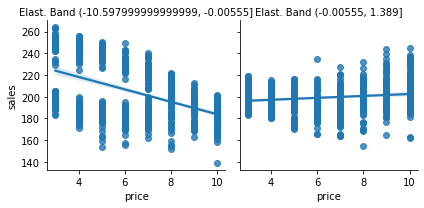

In [11]:
g = sns.FacetGrid(bands_df, col="elast_band")
g.map_dataframe(sns.regplot, x="price", y="sales")
g.set_titles(col_template="Elast. Band {col_name}")

보시다시피, 이러한 분할 전략이 유용해보입니다. 첫번째 그룹(왼쪽)은 높은 가격 민감도를 가지고 있어서, 가격이 올라가면 판매량이 많이 떨어집니다. 반명 두번째 그룹(오른쪽)은, 가격이 올라도 판매량은 거의 변하지 않습니다. 심지어 판매량이 살짝증가하는 것처럼 보이기까지 하는데 그건 아마 노이즈 때문인 것 같습니다. 

같은 것을 ML 예측 모델로 만든 그룹과도 비교해봅시다:

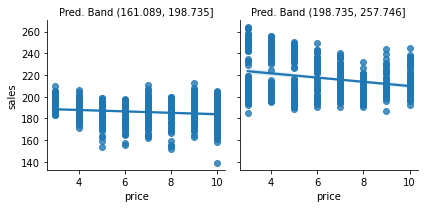

In [12]:
g = sns.FacetGrid(bands_df, col="pred_band")
g.map_dataframe(sns.regplot, x="price", y="sales")
g.set_titles(col_template="Pred. Band {col_name}");

이 플롯은 매우 중요한 점을 알려주기 때문에 정말 마음에 듭니다. 보시다시피 예측 모델 파티션은 Y축에서 유닛들을 분할하고 있습니다. 첫 번째 파티션의 날짜들은 판매량이 많지 않지만 두 번째 파티션의 날짜들은 판매량이 더 많습니다. 저는 이것이 예측 모델이 정확히 해야 할 일, 즉 매출을 예측하기 때문에 놀랍다고 생각합니다. 이제 저는 아이스크림 판매가 적을 날과 많을 날을 구분할 수 있습니다. 
 
유일한 문제는 예측이 지금 여기서는 특별히 유용하지 않다는 것입니다. 궁극적으로 우리는 언제 가격을 인상할 수 있고 언제 인상할 수 없는지 알고 싶습니다. 하지만 예측 모델 파티션에서 선의 기울기를 살펴보면, 선의 기울기가 크게 변하지 않는다는 것을 알 수 있습니다. 다시 말해, 예측 모델이 정의한 두 파티션이 가격 인상에 대해 거의 동일한 반응성을 보인다는 것이죠. 이는 가격이 매출에 전혀 영향을 미치지 않는 것처럼 보이기 때문에 가격을 인상할 수 있는 날이 언제인지에 대한 인사이트를 별로 제공하지 못합니다.


## Key Ideas

우리는 마침내 조건부 평균 처치 효과(CATE)의 개념과 이것이 개인화에 어떻게 유용할 수 있는지 공식화했습니다. 즉, 각 유닛이 치료에 어떻게 반응하는지 이해할 수 있다면, 즉 처치 효과의 이질성을 이해할 수 있다면 유닛의 개별 특성에 따라 최적의 치료를 제공할 수 있습니다.
 
또한 이 목표를 예측 모델의 목표와 대조해 보았습니다. 즉, $Y$를 raw 형태로 예측하는 것에서 $Y$가 $T$에 따라 어떻게 변화하는지 $\frac{\delta y}{\delta t}$를 예측하는 것으로 추정 작업을 다시 생각하고 있습니다. 
 
안타깝게도 이를 위한 모델을 구축하는 방법은 전혀 명확하지 않습니다. 탄력성을 직접 관찰할 수 없기 때문에 이를 예측하는 모델을 만들기가 어렵습니다. 하지만 선형 회귀가 우리를 구원해줬습니다. $Y$를 예측하도록 피팅된 회귀 모델을 사용하여 $\frac{\delta y}{\delta t}$도 예측할 수 있는 방법을 찾았습니다. 또한 처치와 피쳐의 상호작용 항도 포함해야 했습니다. 이를 통해 고객마다 탄력성 예측이 달라지도록 만들었습니다. 다시 말해, 이제 $E[T'(t) | X]$를 추정하게 되었습니다. 그런 다음 이러한 탄력성 예측을 사용하여 처치에 더 민감하거나 덜 민감한 유닛들을 그룹화하여 궁극적으로 각 그룹에 대한 처치 수준을 결정하는 데 도움을 주었습니다.
 
![img](./data/img/causal-model/economists.png)

이 모든 과정에서 자연스럽게 발생하는 한 가지 질문은 선형 회귀를 일반적인 머신 러닝 모델로 대체하고 이를 사용하여 탄력성을 예측할 수 있는지 여부입니다. 대답은 '예'이지만 몇 가지 주의 사항이 있습니다. 이 장에서는 선형 회귀를 사용하면 그 이면의 개념을 더 쉽게 이해할 수 있다고 생각하여 매우 간단한 CATE 모델을 사용했습니다. 하지만 걱정하지 마세요. 다음 장에서는 좀 더 정교한 모델을 살펴볼 것입니다. 하지만 그 전에 먼저 매우 중요한 주제, 즉 두 CATE 모델을 비교하여 어느 것이 더 나은지 결정하는 방법을 다루어야 합니다.

## References

제가 여기에 쓴 글은 대부분 제 머릿속에서 나온 내용입니다. 저는 경험을 통해 배웠습니다. 즉, 제가 여러분에게 직접적으로 제시할 수 있는 참고 자료가 없다는 뜻입니다. 또한 제가 여기에 쓴 내용은 훌륭한 과학이 흔히 거치는 학문적 검토를 거치지 **않았다**는 의미이기도 합니다. 대신, 제가 실제로 작동하는 것들에 대해 이야기하는지에 주의를 기울이되 왜 그런지 설명하는 데 너무 많은 시간을 할애하지 않는다는 점에 주목하세요. 일종의 길거리 과학이라고 할 수 있습니다. 하지만 공개적인 검토를 위해 이 글을 올리는 것이니 터무니없는 부분이 있으면 문제를 제기해 주시면 최선을 다해 해결해 드리겠습니다.

## Contribute

Causal Inference for the Brave and True는 통계 과학의 인과적 추론에 관한 오픈 소스 자료이며 파이썬 기반의 무료 소프트웨어만 사용합니다. 이것의 목표는 금전적, 지적 접근성을 높이는 것입니다.
이 책이 가치 있다고 생각하시고 후원하고 싶으시다면 [Patreon](https://www.patreon.com/causal_inference_for_the_brave_and_true)으로 가주세요. 금전적으로 후원할 준비가 되지 않았다면 오타를 수정하거나, 편집을 제안하거나, 이해하지 못한 구절에 대한 피드백을 제공하는 방식으로도 도움을 줄 수 있습니다. 책의 리포지토리로 이동하여 [이슈 열기](https://github.com/matheusfacure/python-causality-handbook/issues)를 클릭하세요. 마지막으로, 이 콘텐츠가 마음에 드셨다면 유용할 수 있는 다른 사람들과 공유하고 이 책의 [GitHub에서 star](https://github.com/matheusfacure/python-causality-handbook/stargazers)를 눌러주세요.